<a href="https://colab.research.google.com/github/Eugeg94/ProyectoFINALWBL/blob/main/PROYECTOFINAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TRABAJO FINAL DE MARIA EUGENIA GONZALEZ WBL**

##INTRODUCCION

**Contexto empresarial.** WBL son informes semestrales que miden las diferencias de género en la ley. Los puntajes del índice WBL se basan en el promedio de los puntajes de cada economía para los 8 temas incluidos en el puntaje agregado de este año. Una puntuación más alta indica más leyes de igualdad de género, desde la perspectiva de la movilidad, maternidad, pago, emprendedurismo, matrimonio, etc Nos planteamos distintas hipotesis a desarrollar. Desde el Banco Mundial han solicitado un análisis del desarrollo de los Derechos de Mujeres a nivel mundial, para así lograr marcar el campo de acciones presentes y futuras para llegar a una verdadera igualdad.

##**PROBLEMA Y OBJETIVOS**

**Problema comercial.** La tarea consiste en manipular y analizar los datos proporcionados y por medio de visualizaciones responder las preguntas específicas, que se mencionan a continuación.

**Preguntas**

1. ¿Que paises son los que han evolucionado más en el campo de Derechos de Mujeres?
2. ¿Tiene relación la clase social con el Desarrollo de Derechos?
3. Analisis Univariados de Desarrollo de Derechos, relacion con la PAGA, MATRIMONIO Y BIENES
4. Con respecto a la movilidad ¿Las mujeres han ganado más derechos?
5. ¿Tienen los hombres y las mujeres los mismos derechos de propiedad sobre los bienes inmuebles?
6. Con respecto a la Libertad Economica ¿Ha habido una evolución favorecedora?  
7. ¿La edad a la que hombres y mujeres pueden jubilarse con pensión completa es la misma?
8. ¿Cual es la relación entre la Paga y el Indice WBL?
**Pregunta Objetivo:**

En base a todas las variables presentadas en el dataset descubrir: ¿Como han evolucionado los Derechos de las Mujeres?





##**DATA ACQUISITION**
El dataset elegido contiene datos obtenidos del Banco Mundial, en particular estos datos se centran en la evolucion de ciertos Derechos de las Mujeres, en distintos lugares del mundo.
El Dataset es publico y se encuentra en la carpeta de este proyecto.

2.1 Importacion de Librerias

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
from prettytable import PrettyTable
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

mpl.style.use('bmh')

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

2.2 Obtencion de Datos

In [ ]:
df1= pd.read_excel("/content/drive/MyDrive/Datasetwl.xlsx")   #leer el archivo .xlsx para cargar en el notebook
df1.head()

,Economy,Economy Code,ISO Code,Region,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,Can a woman travel outside her home in the same way as a man?,...,Do men and women have equal ownership rights to immovable property?,Do sons and daughters have equal rights to inherit assets from their parents?,Do male and female surviving spouses have equal rights to inherit assets?,Does the law grant spouses equal administrative authority over assets during marriage?,Does the law provide for the valuation of nonmonetary contributions?,PENSION,Is the age at which men and women can retire with full pension benefits the same?,Is the age at which men and women can retire with partial pension benefits the same?,Is the mandatory retirement age for men and women the same?,Are periods of absence due to childcare accounted for in pension benefits?
0,Afghanistan,AFG,AFG,South Asia,Low income,1971,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,Afghanistan,AFG,AFG,South Asia,Low income,1972,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,Afghanistan,AFG,AFG,South Asia,Low income,1973,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,Afghanistan,AFG,AFG,South Asia,Low income,1974,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,Afghanistan,AFG,AFG,South Asia,Low income,1975,26.25,25,No,No,...,Yes,No,No,Yes,No,25,No,No,Yes,No


##** EDA (análisis univariado, bivariado y multivariado)**

In [ ]:
def df1_explore(df1):
    print( 'Shape: ', df1.shape)

    t = PrettyTable(['Column',
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])

    for c in df1.columns:
        t.add_row([c,
                   df1[c].dtype,
                   len(df1[c])-np.sum(df1[c].isna()),
                   np.sum(df1[c].isna()),
                   np.count_nonzero(df1[c].unique()),
                   df1[~df1[c].isnull()][c].iloc[0],
                  ])
    print(t)
    print()
    return

df1_explore(df1)

Shape:  (10070, 55)
+----------------------------------------------------------------------------------------+---------+----------+-------+--------+-------------+
|                                         Column                                         |   Type  | Non-Null | Nulls | Unique |   Example   |
+----------------------------------------------------------------------------------------+---------+----------+-------+--------+-------------+
|                                        Economy                                         |  object |  10070   |   0   |  190   | Afghanistan |
|                                      Economy Code                                      |  object |  10070   |   0   |  190   |     AFG     |
|                                        ISO Code                                        |  object |  10070   |   0   |  190   |     AFG     |
|                                         Region                                         |  object |  10070   |   0   |   

In [ ]:
df1.duplicated().any()

False

**ANALISIS** No se variables de datos nulas ni duplicadas

## Verifico los valores únicos de las variables de tipo object

In [ ]:
def df1_unique_val_col(df1, col_list = [] ):

    cant_table_col = 0
    for i in col_list:
        l = len(df1[i].unique())
        if cant_table_col < l:
            cant_table_col = l

    A = []
    for i in range(cant_table_col):
        A.append('Value : '+str(i))

    dg = pd.DataFrame(index = A,
                          columns = df[col_list].columns)

    for m in df1[col_list]:
        uni = df1[m].unique()
        le = len(uni)

        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de algunos campos de interes')
    return dg


##Estadisticas

In [ ]:
df1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Report Year,10070.0,1997.00,15.30,1971.0,1984.00,1997.00,2010.00,2023.0
WBL INDEX,10070.0,59.73,18.62,17.5,46.88,59.38,73.12,100.0
MOBILITY,10070.0,82.14,25.73,0.0,75.00,100.00,100.00,100.0
WORKPLACE,10070.0,43.08,33.70,0.0,25.00,25.00,75.00,100.0
PAY,10070.0,47.66,31.27,0.0,25.00,50.00,75.00,100.0
MARRIAGE,10070.0,61.81,29.89,0.0,40.00,80.00,80.00,100.0
PARENTHOOD,10070.0,34.98,30.64,0.0,0.00,20.00,60.00,100.0
Length of paid maternity leave,10070.0,85.44,62.11,0.0,60.00,84.00,101.00,635.0
Length of paid paternity leave,10070.0,1.75,6.84,0.0,0.00,0.00,0.00,180.0
Shared days,10070.0,38.56,159.93,0.0,0.00,0.00,0.00,1460.0


Analizo distribuciones y participaciones
## 1.¿Que países son los que han evolucionado más en el campo de Derechos de Mujeres?




Text(0.5, 0, 'Region')

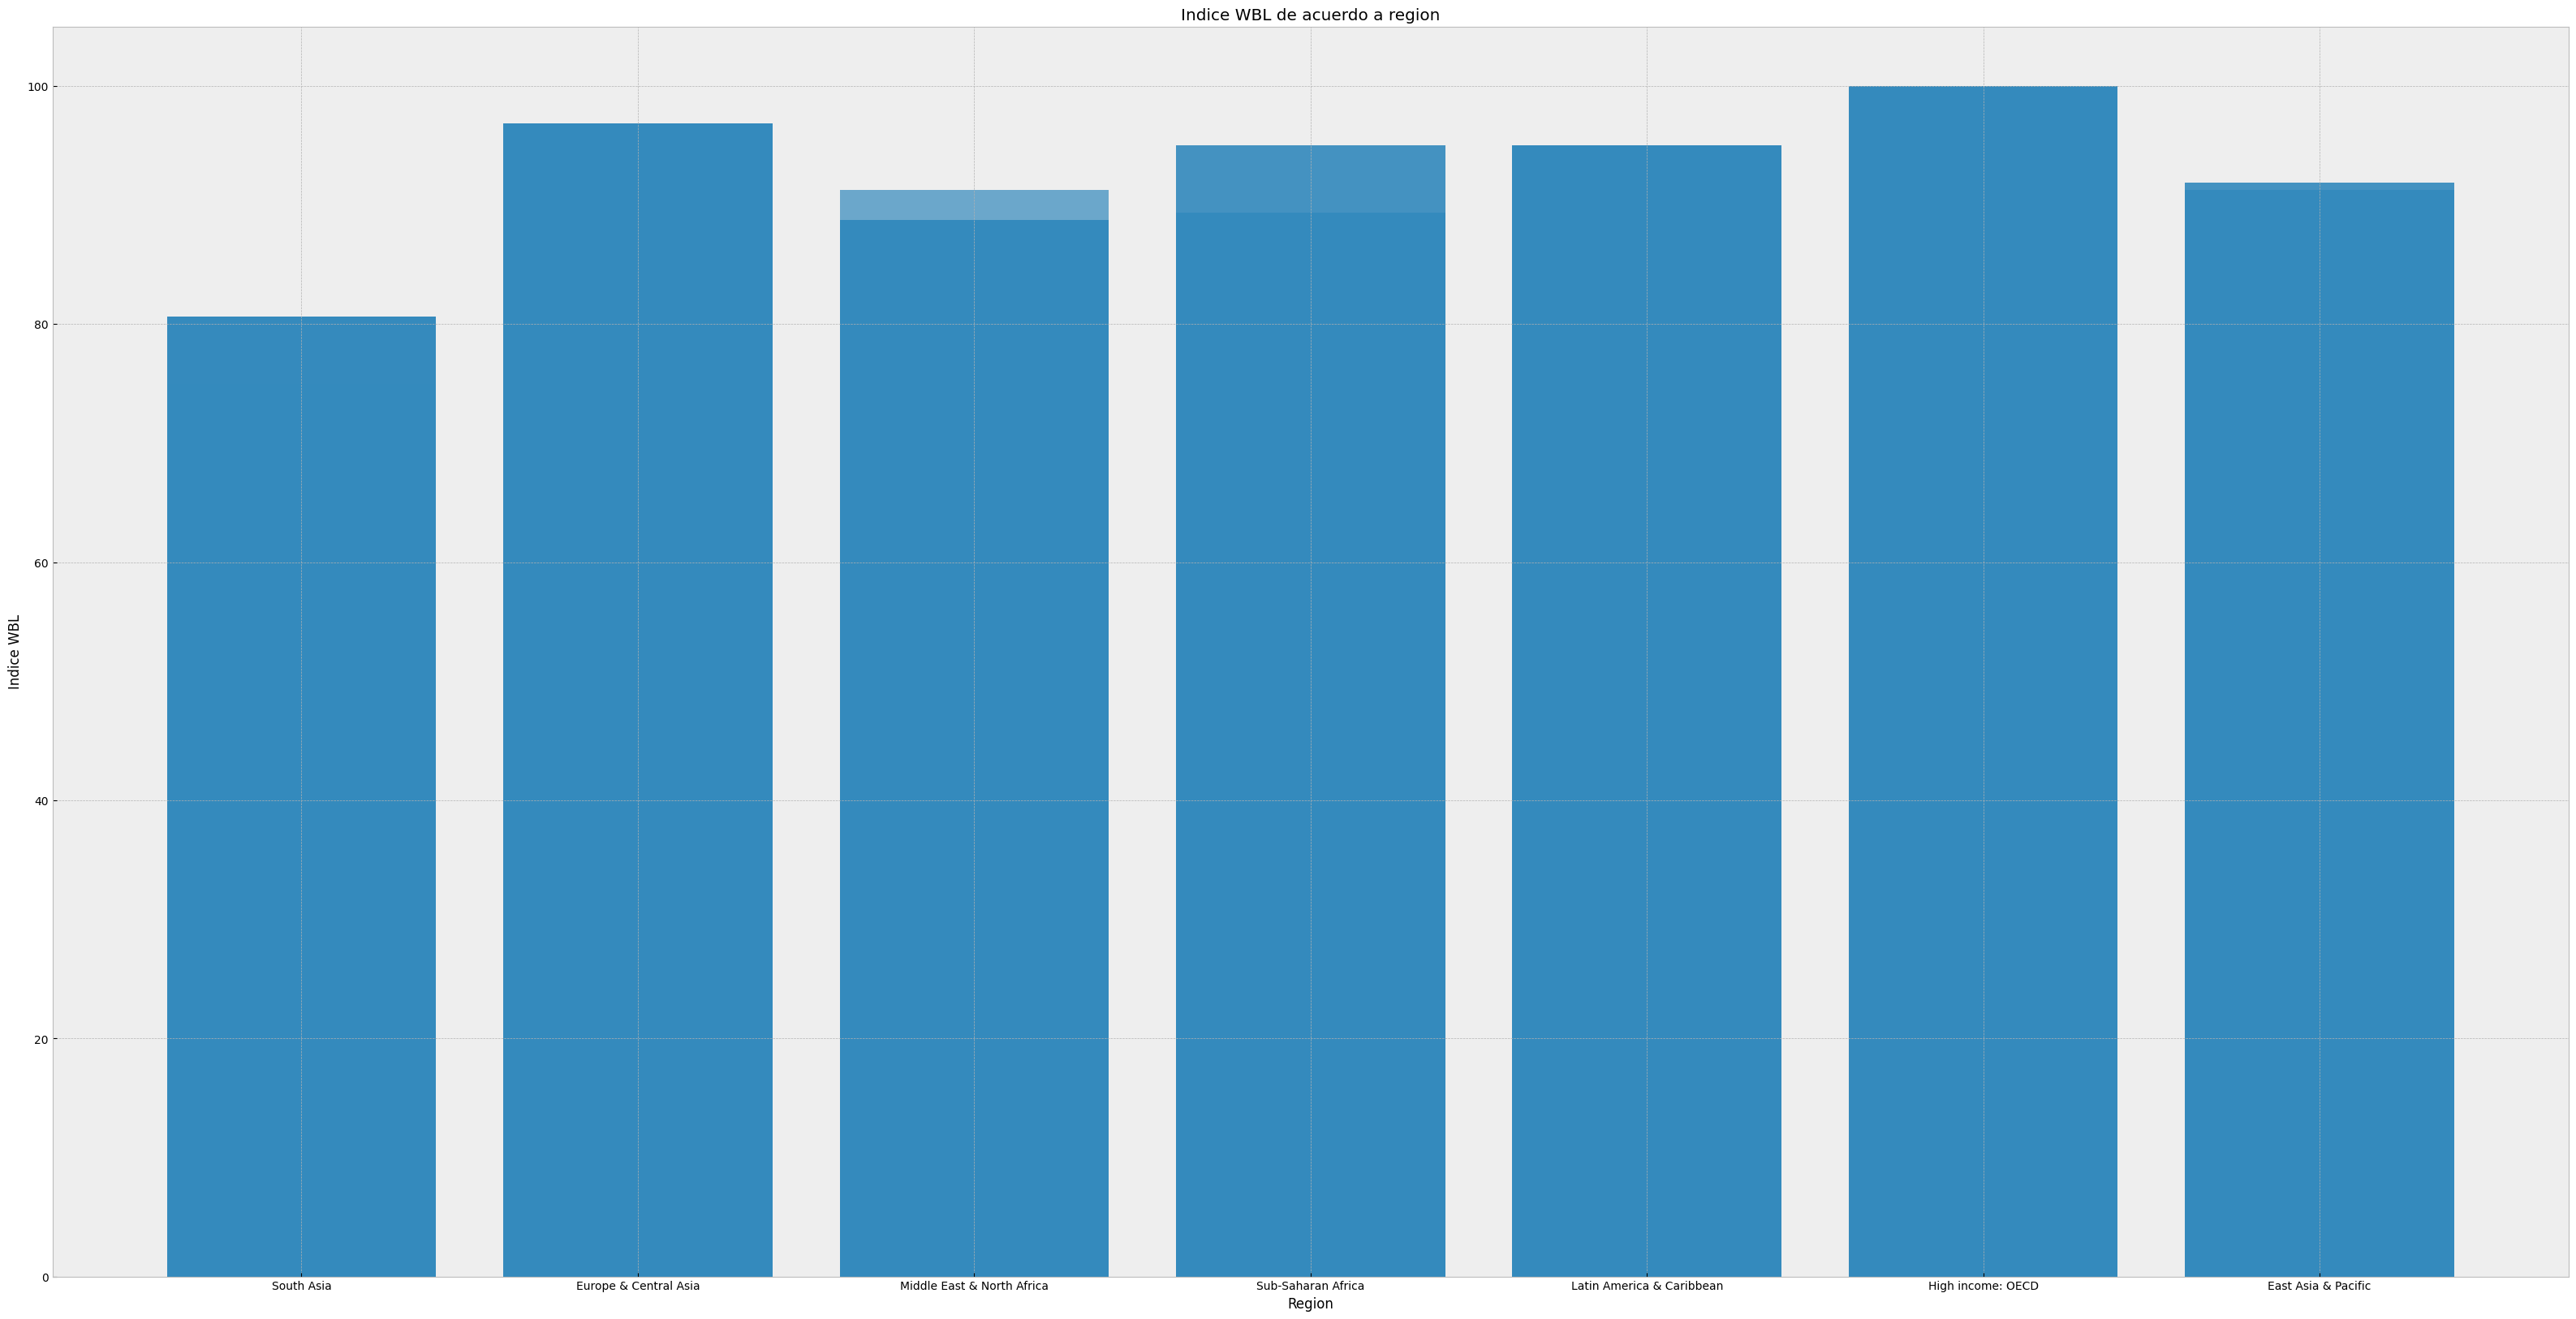

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))
ax.bar ( df1['Region'],df1['WBL INDEX'], alpha=0.7)
ax.set_title('Indice WBL de acuerdo a region')
ax.set_ylabel('Indice WBL')
ax.set_xlabel('Region')

**ANALISIS** En esta grafica se denota la diferencia entre regiones mas desarolladas en el campo de los derechos de mujeres.
Podemos ver que Europa y Asia central, además de los paises integrantes de grandes ingresos OECD cuentan con mayor desarrollo que los demás paises.

## 2.¿Tiene relación la clase social con el Desarrollo de Derechos?

Text(0.5, 0, 'Segmentos de ingresos')

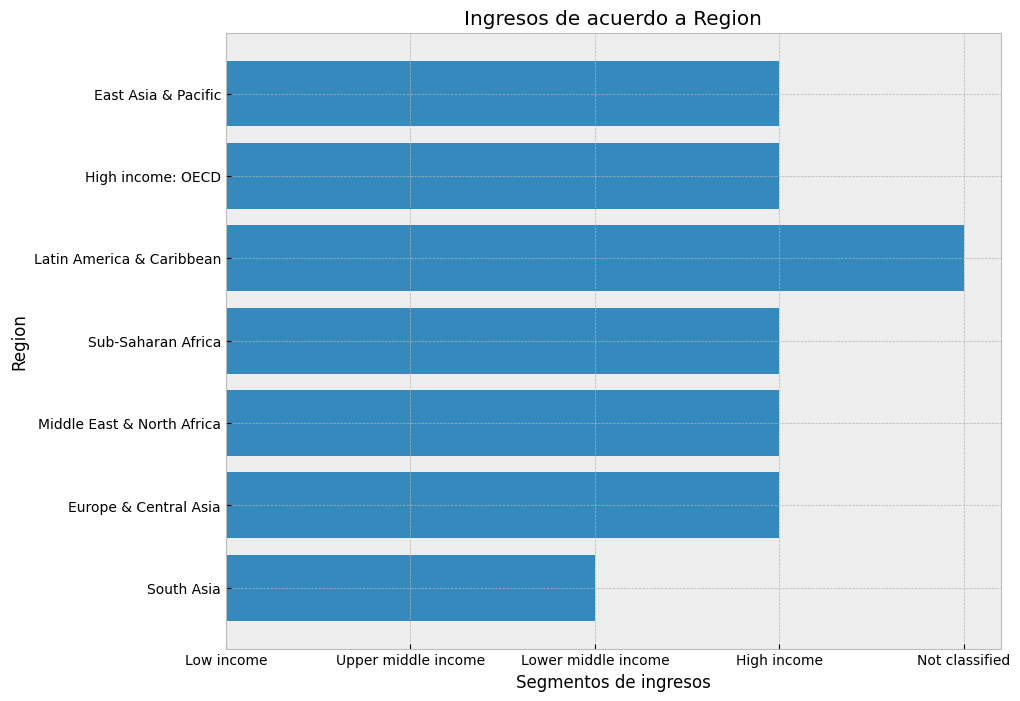

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(df1['Region'], df1['Income Group'])
ax.set_title('Ingresos de acuerdo a Region')
ax.set_ylabel('Region')
ax.set_xlabel('Segmentos de ingresos')

<Axes: xlabel='WBL INDEX', ylabel='Count'>

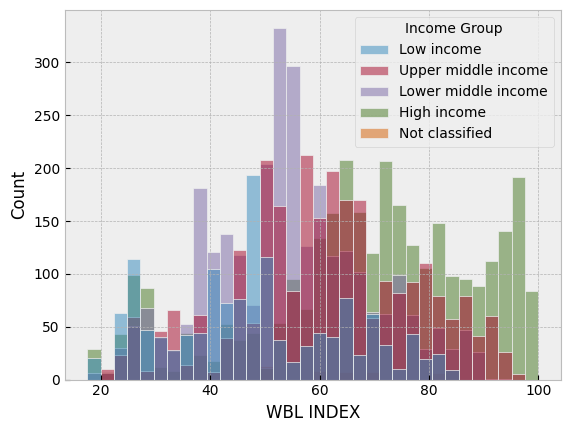

In [ ]:
sns.histplot(x = df1['WBL INDEX'], hue = df1['Income Group'], data= df1)

In [ ]:
def column_exploration(df1,column_name,sort_index=False):

    print(f'COLUMN: {column_name}')
    abs_values =df1[column_name].value_counts()
    prc_values =(df1[column_name].value_counts(normalize=True)*100).apply(lambda x:round(x,1))
    df1_values = pd.merge(abs_values, prc_values, left_index=True, right_index=True, suffixes=('_abs','_prc'))

    if sort_index is True:
        df1_values = df1_values.sort_index(axis = 0)

    ax = df1_values[column_name+'_abs'].plot(kind='bar', figsize=(12,6))
    ax.set_title(f"WBL INDEX by {column_name}")
    ax.set_xlabel(column_name)
    ax.set_ylabel('WBL INDEX')
    rects = ax.patches
    labels = [f'{p}%' for p in df1_values[column_name+'_prc'].to_list()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2 , height + 1, label,
                ha='center', va='bottom')

    return

COLUMN: Income Group


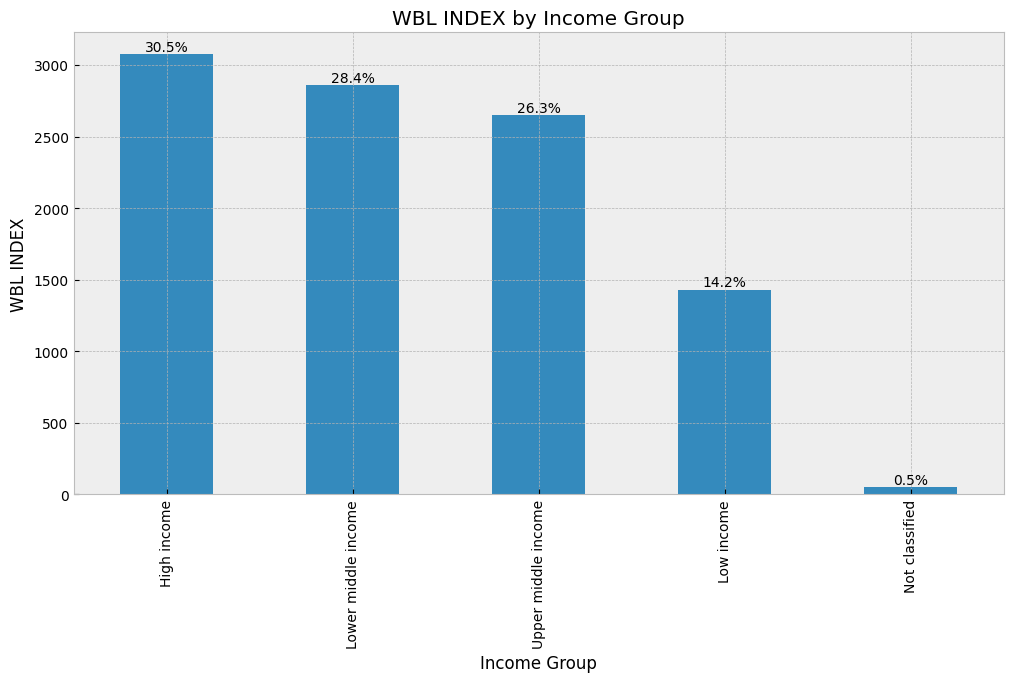

In [ ]:
column_exploration(df1,'Income Group')

**ANALISIS** Si bien en la primera grafica podemos notar que no existe una manera de afirmar si hay una verdadera relación entre clase social y desarrollo, sin cierto error, ya que Latinoamerica y el caribe no estan clasificados.
Por medio de una segunda y tercera lectura notamos que si hay relación directa con el nivel de ingresos y el desarrollo de Derechos femeninos, así los grupos que más desarrollados se encuentran son grupos de clases de  ingresos altos y medios inclinados a altos.

## 3.Analisis Univariados de Desarrollo de Derechos, relacion con la PAGA, MATRIMONIO Y BIENES

COLUMN: PAY


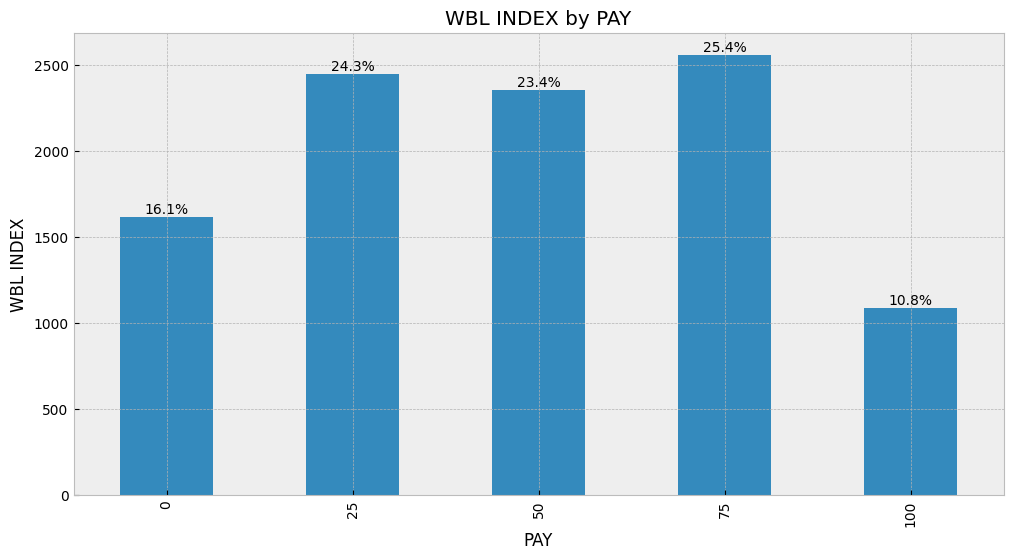

In [ ]:
column_exploration(df1,'PAY',True)

COLUMN: ASSETS


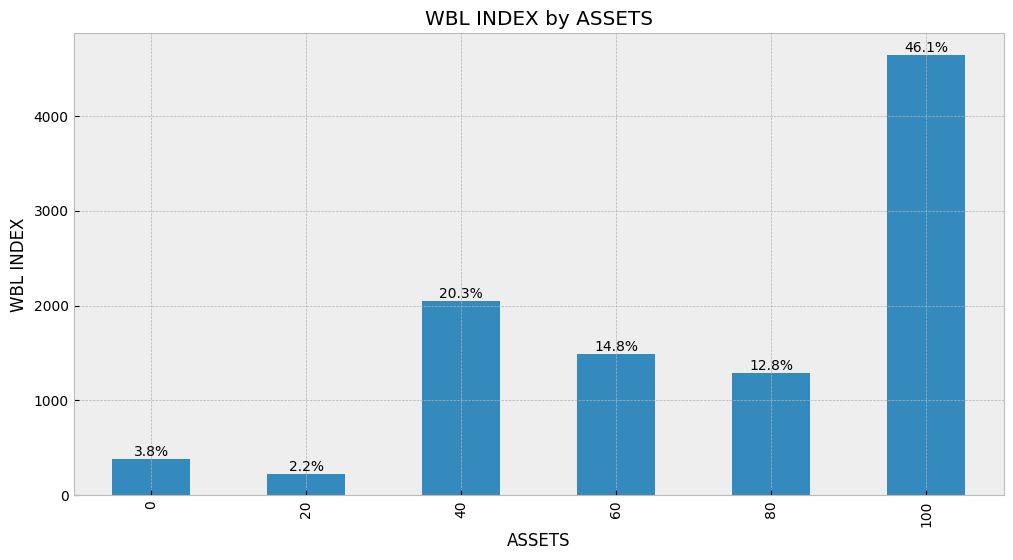

In [ ]:
column_exploration(df1,'ASSETS',True)

COLUMN: MARRIAGE


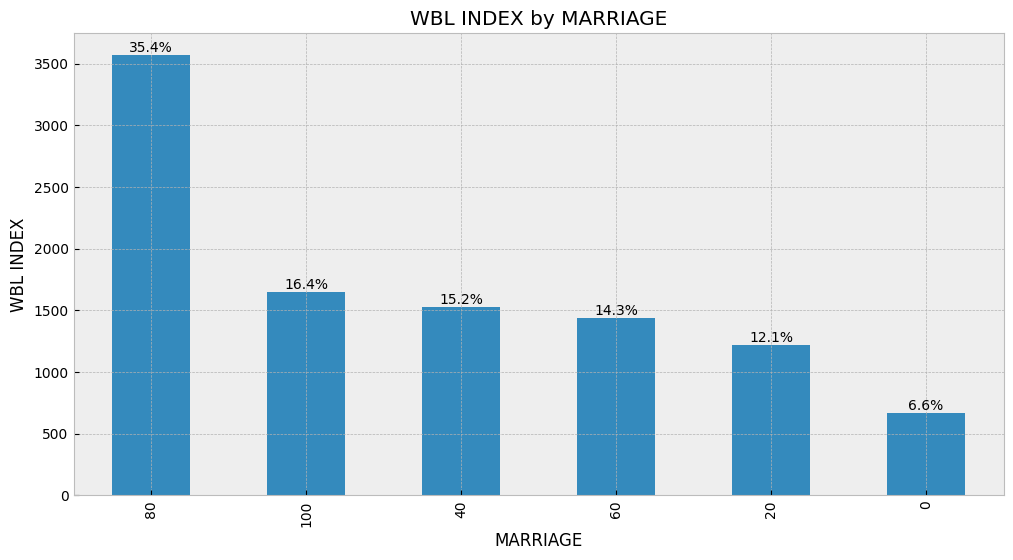

In [ ]:
column_exploration(df1,'MARRIAGE')

**ANALISIS** Podemos notar que no hay una relacion directa entre paga y la evolucion de Derechos, pero si en lo relativo al matrimonio y bienes.

In [ ]:
from seaborn import lmplot

## 4.Con respecto a la movilidad ¿Las mujeres han ganado más derechos?

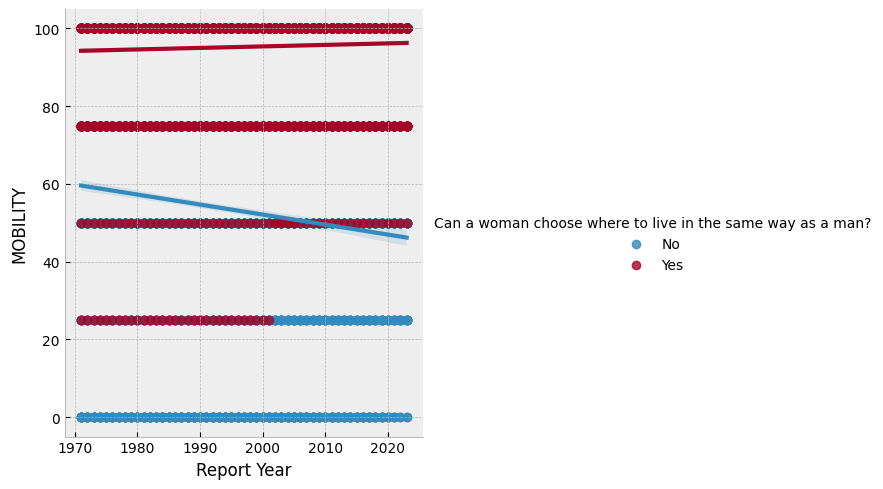

In [ ]:
lmplot(x="Report Year", y="MOBILITY", hue= "Can a woman choose where to live in the same way as a man?", data=df1)

**ANALISIS** Tal como se puede ver, la respuesta más que con una variable de tiempo tiene que ver con la movilidad con la que cuentan estas mujeres.
Así en grupos con menor movilidad la respuesta es negativa, inversamente de lo que sucede en grupos de más movilidad.
Sin embargo se nota que hay aumento de libertad a partir de 1990, por lo que afirmamos que dependiendo la movilidad la respuesta será afirmativa o negativa.

##5.¿Tienen los hombres y las mujeres los mismos derechos de propiedad sobre los bienes inmuebles?


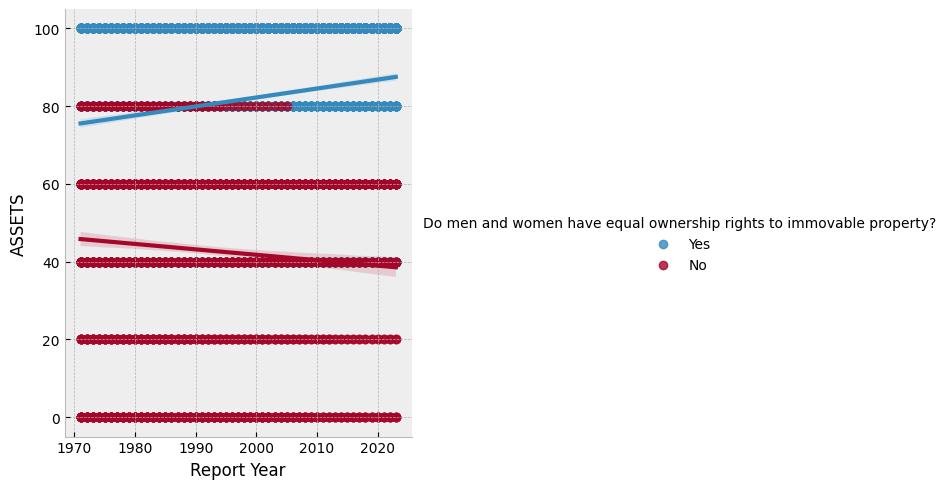

In [ ]:
lmplot(x="Report Year", y="ASSETS", hue="Do men and women have equal ownership rights to immovable property?", data=df1)

**ANALISIS** Al igual que en la pregunta anterior, la respuesta más que con una variable de tiempo tiene que ver con la movilidad con la que cuentan estas mujeres.
A partir del 2000 solo en segmentos desarrollados altos  las mujeres afirman tener igualdad, sin embargo en la mayoria de los segmentos e historicamente sigue siendo un sector para tomar acciones y alcanzar la igualdad.

## 6.Con respecto a la Libertad Economica ¿Ha habido una evolución favorecedora?

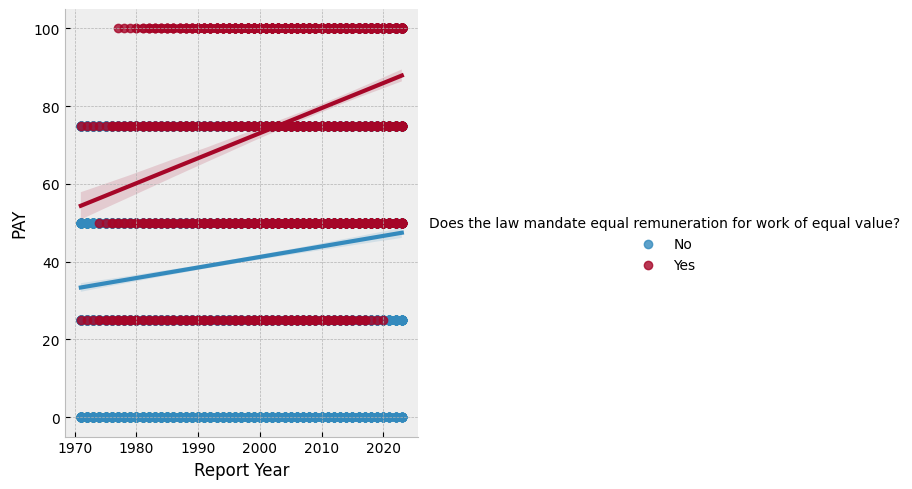

In [ ]:
lmplot(x="Report Year", y="PAY", hue="Does the law mandate equal remuneration for work of equal value?", data=df1)

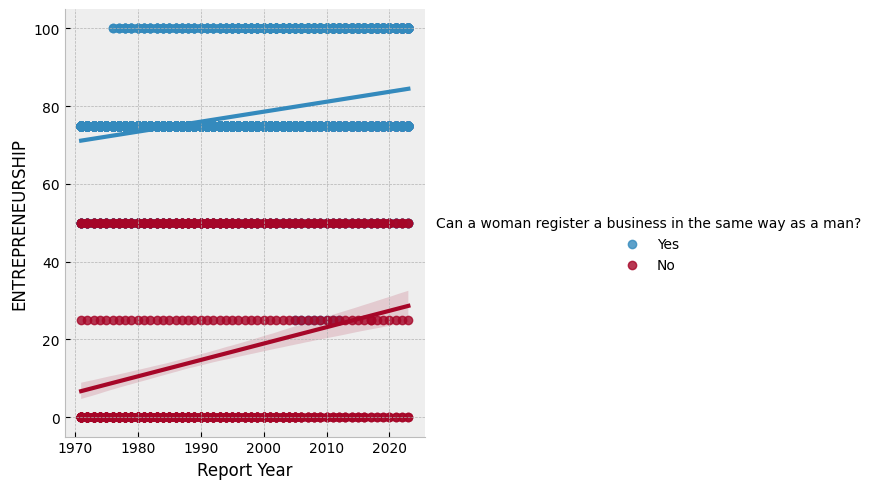

In [ ]:
lmplot(x="Report Year", y="ENTREPRENEURSHIP", hue="Can a woman register a business in the same way as a man?", data=df1)

**ANALISIS** Bajo el análisis de dos puntos, si hubo una evolución favorecedora de libertades pero que ha beneficiados más a mujeres dependientes de alguna empresa, mientras que en mujeres emprendedoras independiente no hubo una evolución historica favorecedora, si excepcionalmente  en casos de desarrollo alto.

## 7.¿La edad a la que hombres y mujeres pueden jubilarse con pensión completa es la misma?

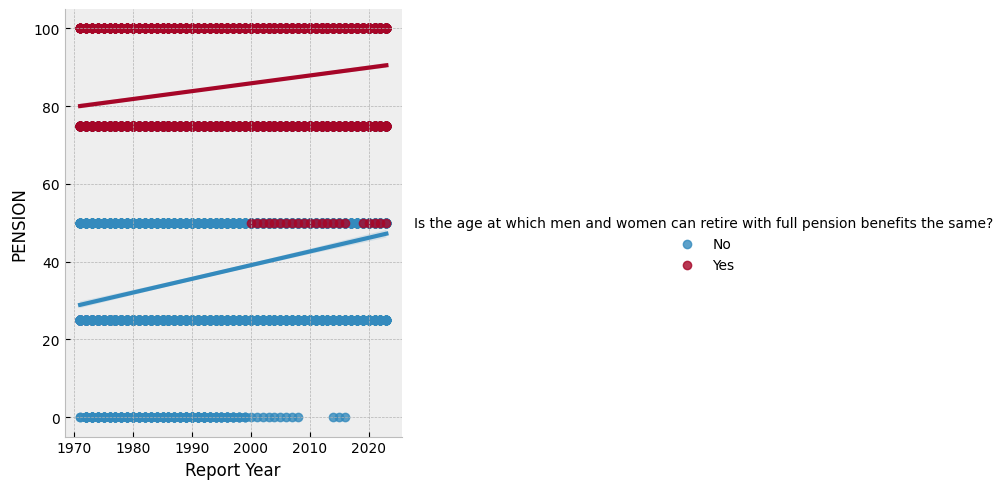

In [ ]:
lmplot(x="Report Year", y="PENSION", hue="Is the age at which men and women can retire with full pension benefits the same?", data=df1)

**ANALISIS** La respuesta es parcialmente afirmativa, ya que también depende de que sector se trate. En el 20% correspondiente a los menos desarrollados la edad continua siendo distinta.

## 8.¿Cual es la relacion entre la Paga y el Indice WBL?

In [ ]:
crosstab=pd.crosstab(index=df1['WBL INDEX'], columns=df1['PAY'])
crosstab

PAY,0,25,50,75,100
WBL INDEX,,,,,
17.500,49,0,0,0,0
18.750,6,0,0,0,0
20.000,0,1,0,0,0
20.625,7,13,0,0,0
21.875,2,0,0,0,0
...,...,...,...,...,...
94.375,0,0,0,16,54
95.000,0,0,0,0,42
96.875,0,0,0,23,41


<Axes: xlabel='PAY', ylabel='WBL INDEX'>

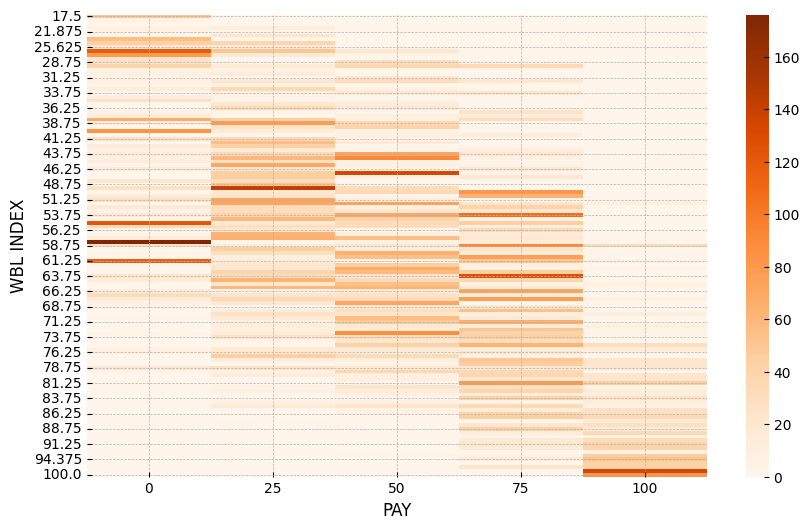

In [ ]:
from matplotlib import rcParams
plt.subplots(figsize=(10,6))
rcParams['figure.figsize'] = 8,4
import seaborn as sns
sns.heatmap(crosstab,cmap='Oranges')

**ANALISIS**  En esta situación lo que podemos ver es que la mayor concentración se encuentra en los sectores intermedios en la franja de 43 y 58, mostrandonos que no existe relacion entre la paga y la evolucion de Derechos


## 9.Analisis Multivariado

### 9.1 Correlacion Indice vs Emprendedurismo

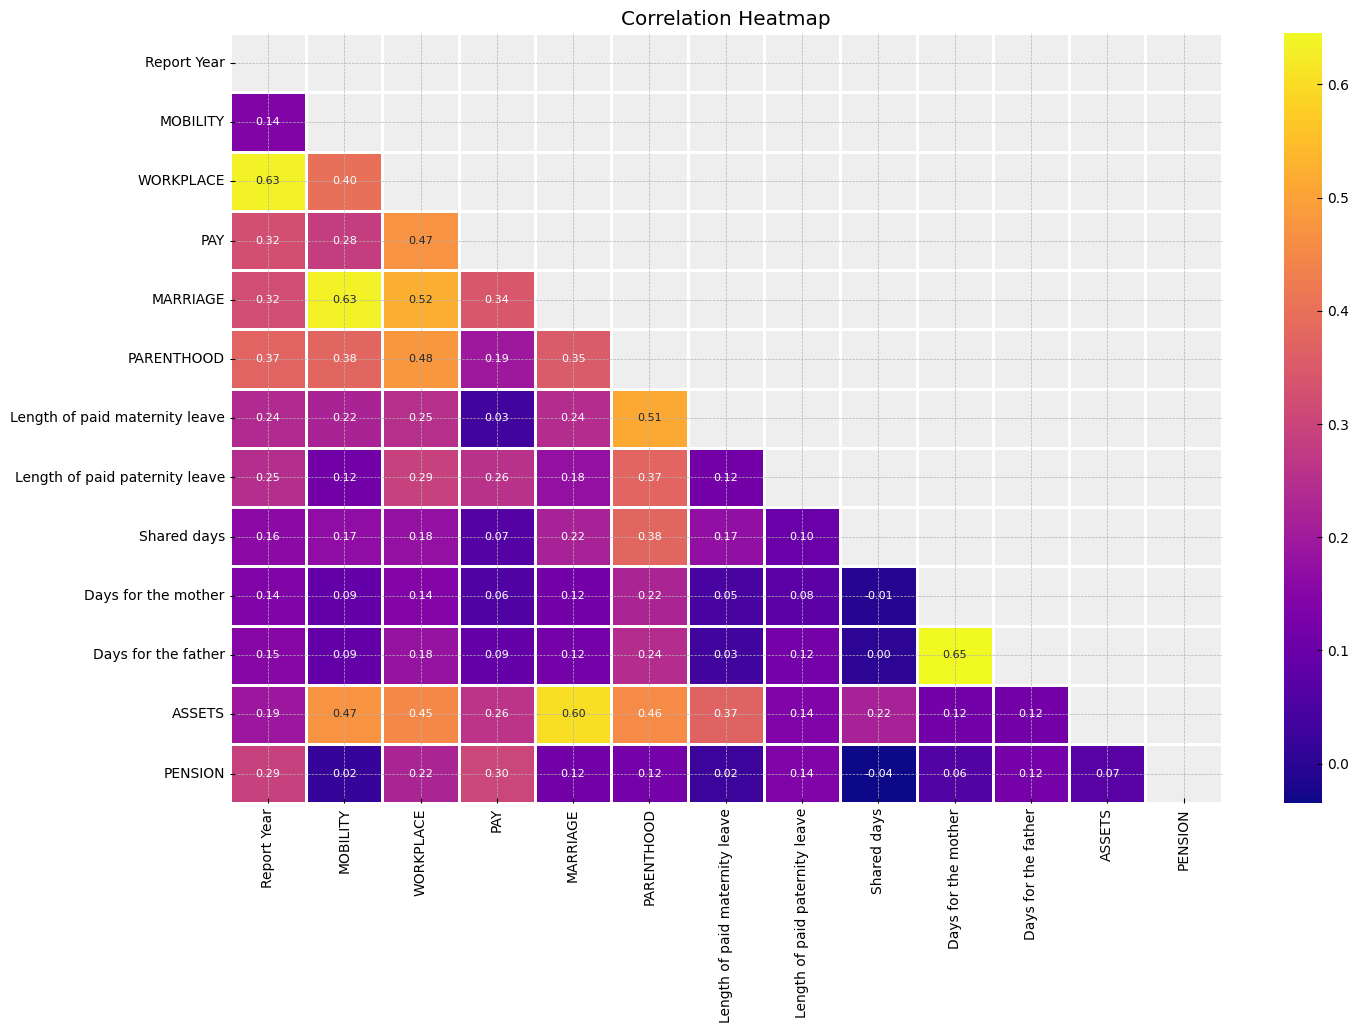

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','ENTREPRENEURSHIP'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()


### 9.2 Correlacion Indice vs Matrimonio

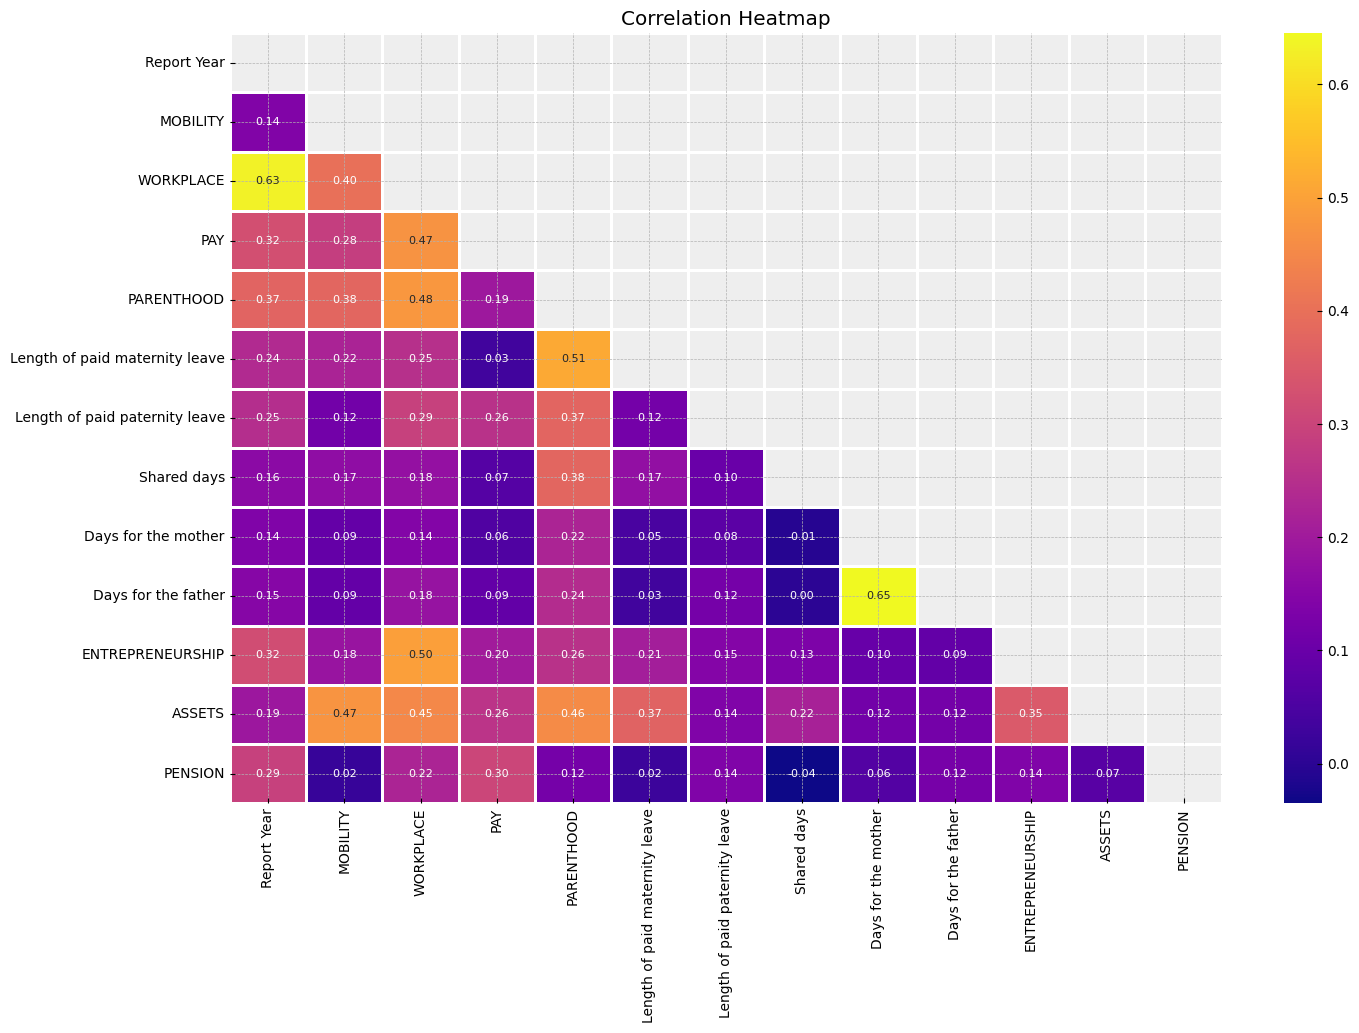

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','MARRIAGE'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### 9.3 Correlacion Indice vs Bienes

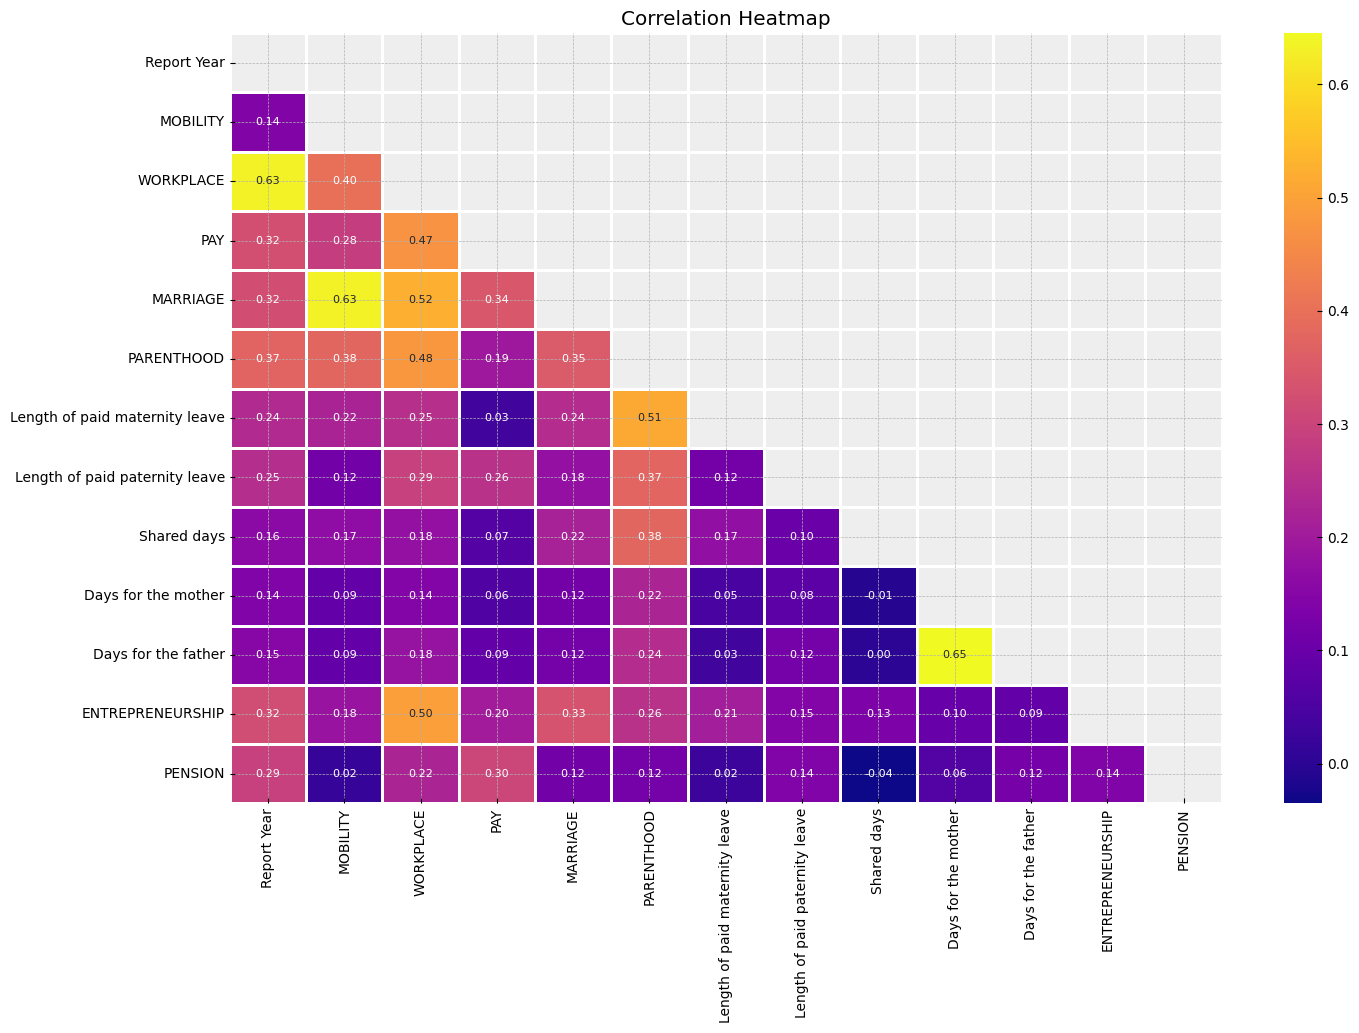

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','ASSETS'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### 9.4 Correlacion Indice vs Paga

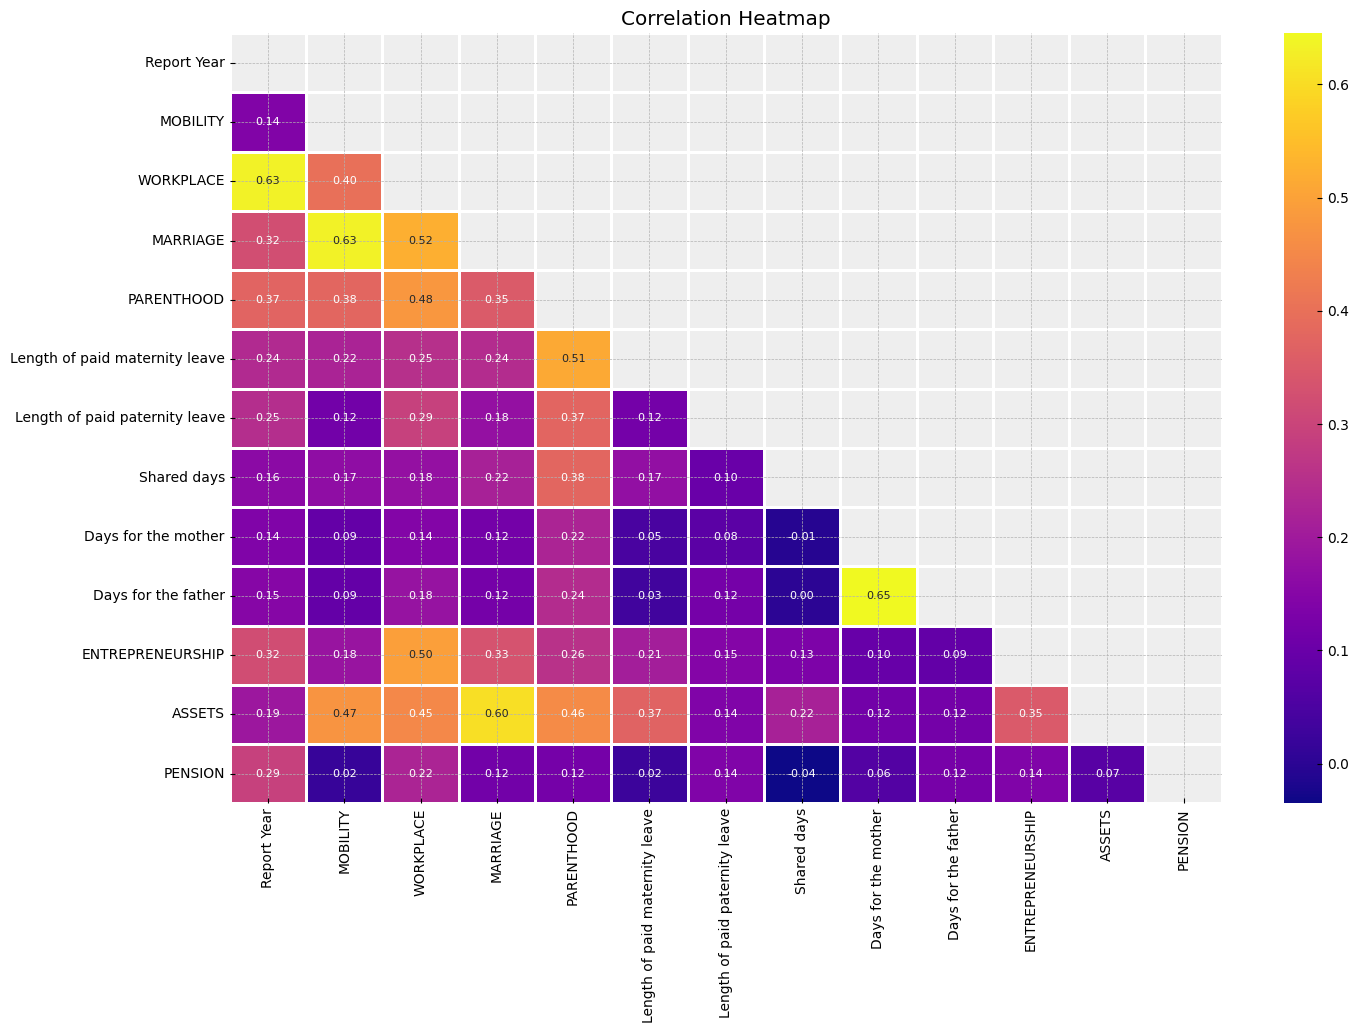

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','PAY'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### 9.5 Correlacion Indice vs Pensiones

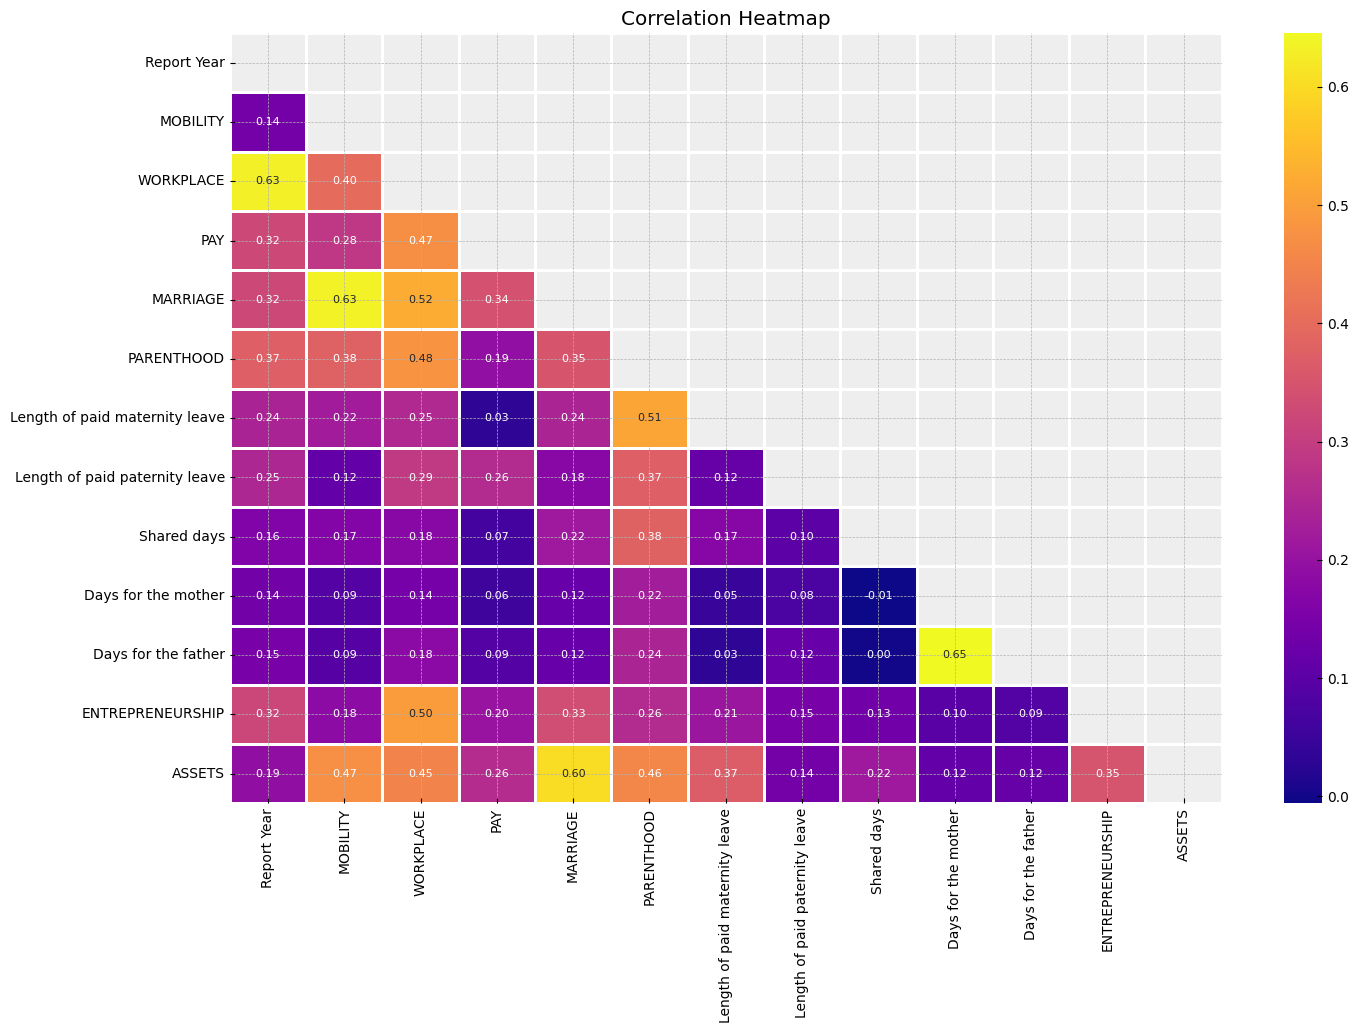

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','PENSION'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### 9.6 Correlacion Indice vs Mobilidad

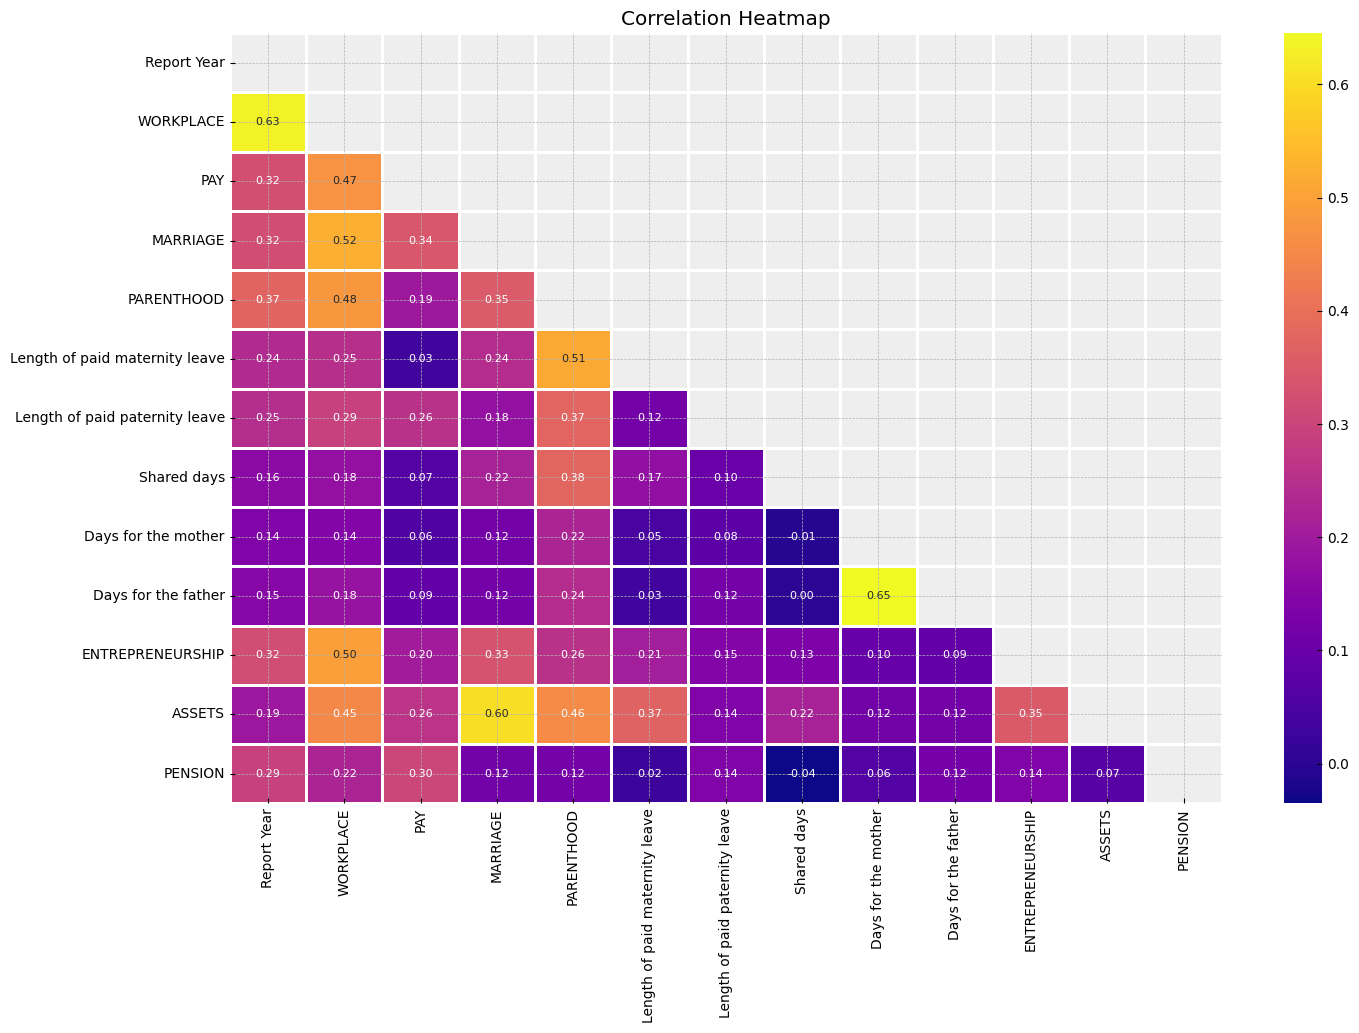

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','MOBILITY'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### 9.7 Correlacion Indice vs Lugar de trabajo

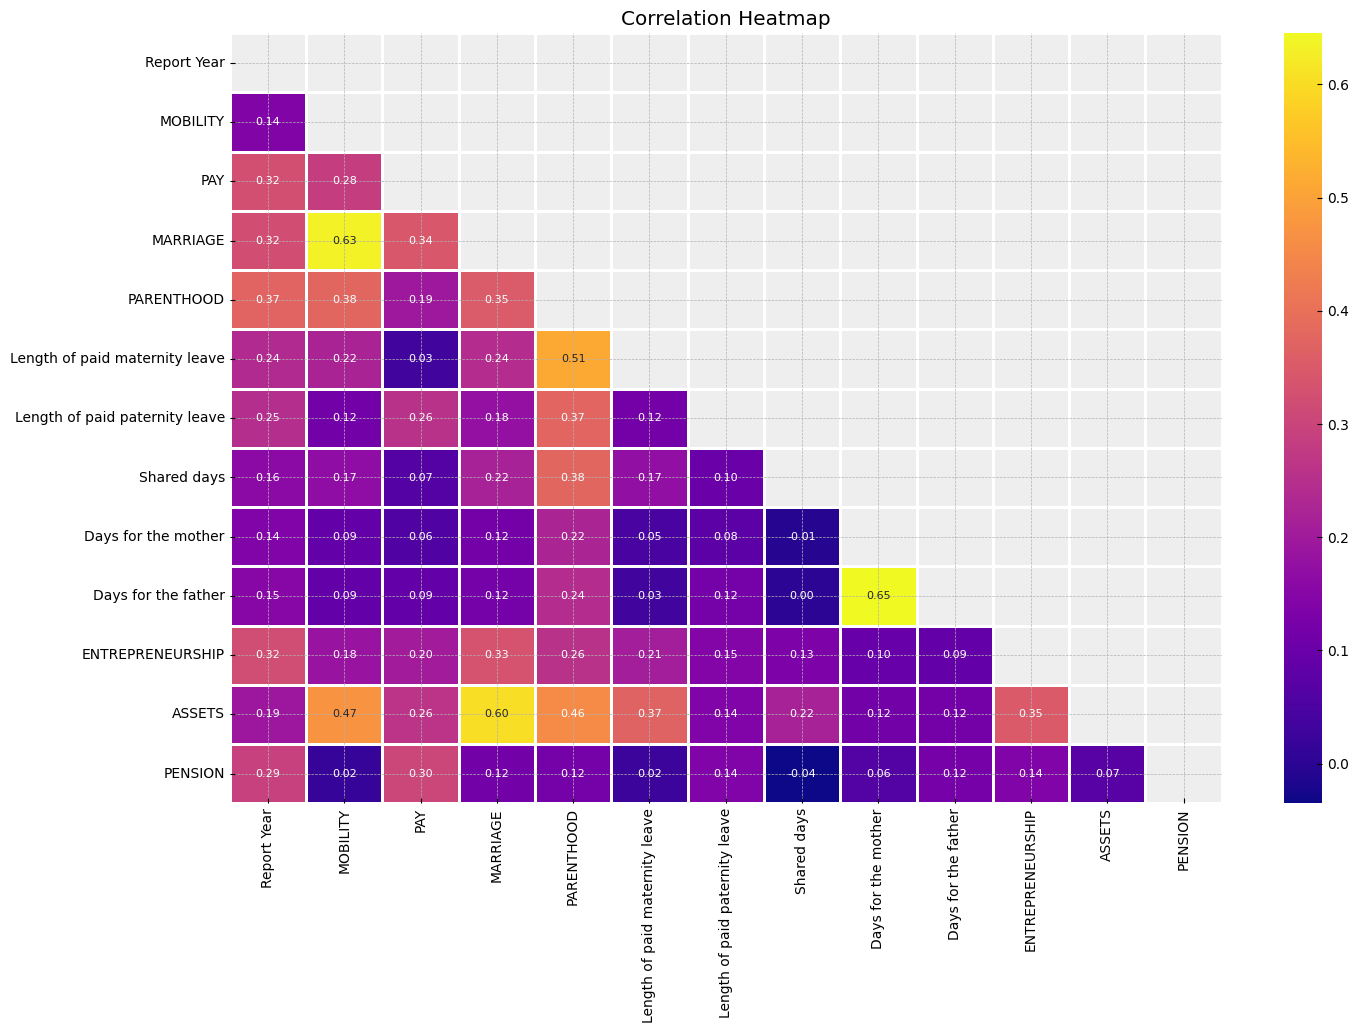

In [ ]:
#plt.figure(dpi = 90,figsize= (10,10))
df1_ = df1.drop(['WBL INDEX','WORKPLACE'],axis=1)

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df1_.corr(),dtype = bool))
sns.heatmap(df1_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**ANALISIS** De los sucesivos analisis, podemos notar que las correlaciones entre variables con indices mayores a 0,6 se verifican que son pocas las variables que llegan arriba de esos valores. Notando que en definitiva, si existe un vinculo no se trata de un vinculo directo.



## 10 Evolucion de Derechos relaciones sobre ingreso y regiones

### 10.1 Derechos de la Propiedad relaciones sobre ingreso y regiones

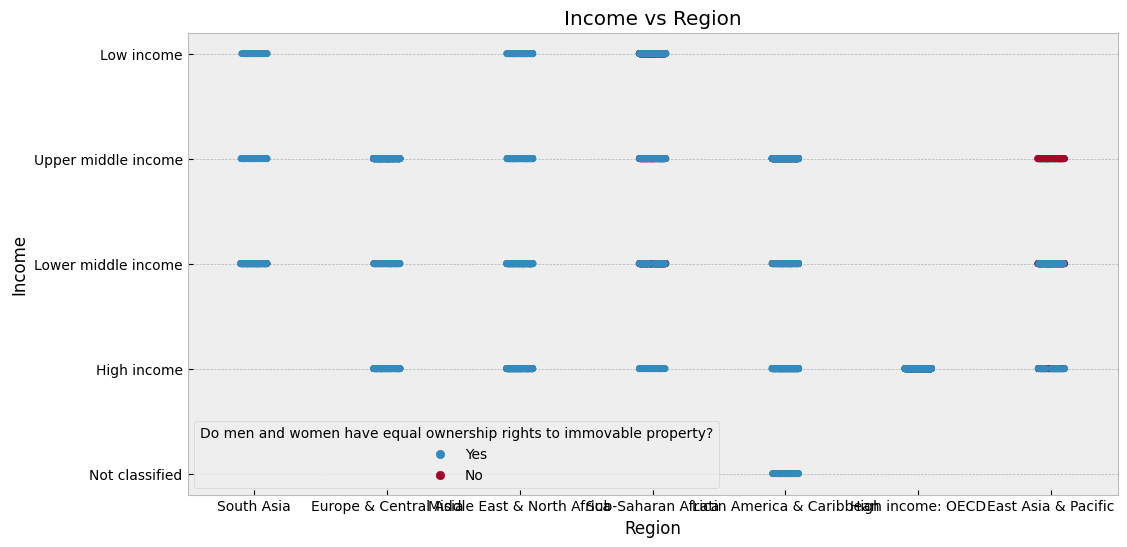

In [ ]:
plt.subplots(figsize=(12,6))
plt.title('Income vs Region')
ax = sns.stripplot(x="Region", y="Income Group", hue = "Do men and women have equal ownership rights to immovable property?", data=df1)#, palette = 'pastel')
plt.ylabel('Income')
plt.show()

### 10.2 Seguridad social relaciones sobre ingreso y regiones

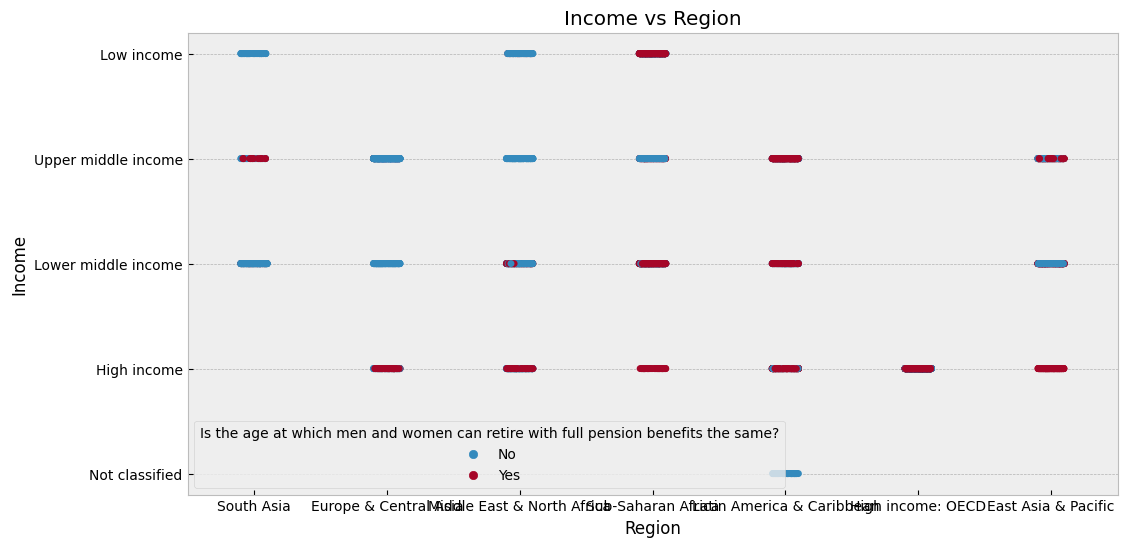

In [ ]:
plt.subplots(figsize=(12,6))
plt.title('Income vs Region')
ax = sns.stripplot(x="Region", y="Income Group", hue = "Is the age at which men and women can retire with full pension benefits the same?", data=df1)#, palette = 'pastel')
plt.ylabel('Income')
plt.show()

### 10.3 Remuneracion y relaciones sobre ingreso y regiones

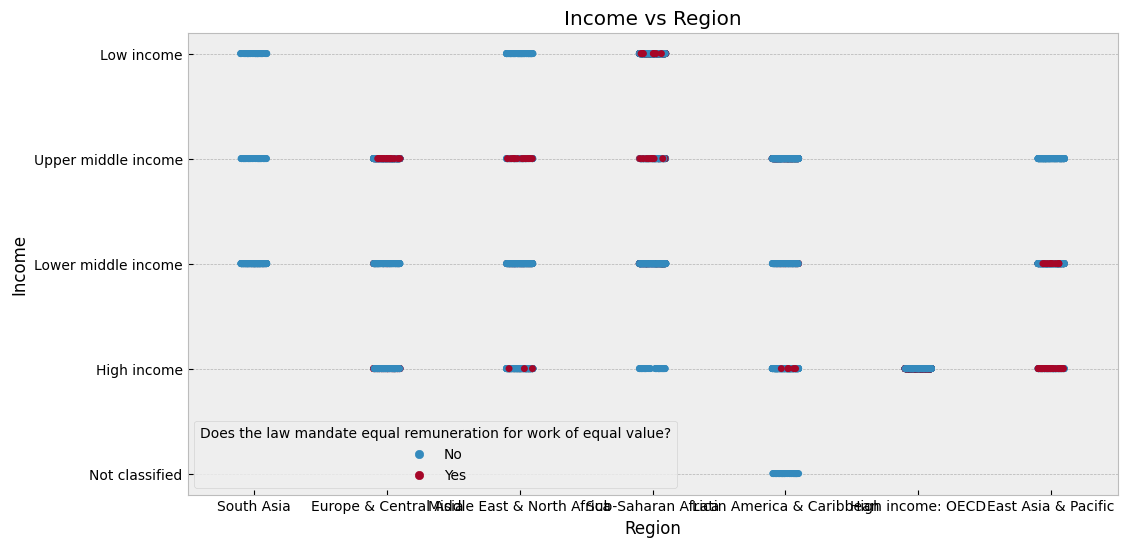

In [ ]:
plt.subplots(figsize=(12,6))
plt.title('Income vs Region')
ax = sns.stripplot(x="Region", y="Income Group", hue = "Does the law mandate equal remuneration for work of equal value?", data=df1)#, palette = 'pastel')
plt.ylabel('Income')
plt.show()

**ANALISIS** En lo relativo a los Derechos de la propiedad, existe una relacion directa entre bienes e ingresos, pero es indistinto en lo referido a las zonas.
Con respecto a los beneficios de  pensiones no se notan en las clases sociales altas pero si en los sectores sociales medios y bajos, cuestion que llama bastante la atencion. En lo relativo a los ingresos pasa lo inverso.


##11 Limpieza y filtrado  de Datos

In [ ]:

df1_1 = df1.copy()

df1_1 = df1_1.drop(columns=['Length of paid paternity leave', 'Days for the father' , 'Is paid leave of at least 14 weeks available to mothers?', 'Can a woman travel outside her home in the same way as a man?', 'Can a woman apply for a passport in the same way as a man?', 'Can a woman travel outside the country in the same way as a man?', 'Are there criminal penalties or civil remedies for sexual harassment in employment?', 'Can a woman work at night in the same way as a man?', 'Can a woman work in a job deemed dangerous in the same way as a man?', 'Can a woman work in an industrial job in the same way as a man?', 'Is the law free of legal provisions that require a married woman to obey her husband?', 'Can a woman be head of household in the same way as a man?', 'Does a woman have the same rights to remarry as a man?', 'Is paid leave of at least 14 weeks available to mothers?','Does the government administer 100% of maternity leave benefits?', 'Is there paid leave available to fathers?', 'Is there paid parental leave?', 'Is dismissal of pregnant workers prohibited?', 'Does the law prohibit discrimination in access to credit based on gender?', 'Can a woman sign a contract in the same way as a man?', 'Can a woman open a bank account in the same way as a man?', 'Do sons and daughters have equal rights to inherit assets from their parents?', 'Do male and female surviving spouses have equal rights to inherit assets?', 'Does the law grant spouses equal administrative authority over assets during marriage?', 'Does the law provide for the valuation of nonmonetary contributions?', 'Is the age at which men and women can retire with partial pension benefits the same?', 'Is the mandatory retirement age for men and women the same?', 'Are periods of absence due to childcare accounted for in pension benefits?', 'Economy Code', 'ISO Code', 'Region' ] )

df1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10070 entries, 0 to 10069
Data columns (total 25 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Economy                                                                            10070 non-null  object 
 1   Income Group                                                                       10070 non-null  object 
 2   Report Year                                                                        10070 non-null  int64  
 3   WBL INDEX                                                                          10070 non-null  float64
 4   MOBILITY                                                                           10070 non-null  int64  
 5   Can a woman choose where to live in the same way as a man?                         10070 non-null  obj

###11.1 Transformacion de variables

In [ ]:


le_Economy = preprocessing.LabelEncoder()
df1_1['Economy']   = le_Economy.fit_transform(df1_1['Economy'] )
le_IncomeGroup = preprocessing.LabelEncoder()
df1_1['Income Group']  = le_IncomeGroup .fit_transform(df1_1['Income Group'] )
le_Canawomanchoosewheretoliveinthesamewayasaman = preprocessing.LabelEncoder()
df1_1['Can a woman choose where to live in the same way as a man?']  = le_Canawomanchoosewheretoliveinthesamewayasaman .fit_transform(df1_1['Can a woman choose where to live in the same way as a man?'] )
le_Canawomangetajobinthesamewayasaman = preprocessing.LabelEncoder()
df1_1['Can a woman get a job in the same way as a man?']  = le_Canawomangetajobinthesamewayasaman .fit_transform(df1_1['Can a woman get a job in the same way as a man?'] )
le_Doestlawdiscriminationgender = preprocessing.LabelEncoder()
df1_1['Does the law prohibit discrimination in employment based on gender?']   = le_Doestlawdiscriminationgender.fit_transform(df1_1['Does the law prohibit discrimination in employment based on gender?'] )
le_Isexualharassmentemployment = preprocessing.LabelEncoder()
df1_1['Is there legislation on sexual harassment in employment?']   = le_Isexualharassmentemployment.fit_transform(df1_1['Is there legislation on sexual harassment in employment?'] )
le_Doesequalremuneration = preprocessing.LabelEncoder()
df1_1['Does the law mandate equal remuneration for work of equal value?']   = le_Doesequalremuneration.fit_transform(df1_1['Does the law mandate equal remuneration for work of equal value?'] )
le_Candivorcesameasman = preprocessing.LabelEncoder()
df1_1['Can a woman obtain a judgment of divorce in the same way as a man?']   = le_Candivorcesameasman.fit_transform(df1_1['Can a woman obtain a judgment of divorce in the same way as a man?'] )
le_Canregisterbusinesssameasman = preprocessing.LabelEncoder()
df1_1['Can a woman register a business in the same way as a man?']   = le_Canregisterbusinesssameasman.fit_transform(df1_1['Can a woman register a business in the same way as a man?'] )
le_Doequalownershiprightsimmovableproperty = preprocessing.LabelEncoder()
df1_1['Do men and women have equal ownership rights to immovable property?']   = le_Doequalownershiprightsimmovableproperty.fit_transform(df1_1['Do men and women have equal ownership rights to immovable property?'] )
le_Isageretirefullpensionsame  = preprocessing.LabelEncoder()
df1_1['Is the age at which men and women can retire with full pension benefits the same?']   = le_Isageretirefullpensionsame.fit_transform(df1_1['Is the age at which men and women can retire with full pension benefits the same?'] )
le_Idomesticviolence = preprocessing.LabelEncoder()
df1_1['Is there legislation specifically addressing domestic violence?']   = le_Idomesticviolence.fit_transform(df1_1['Is there legislation specifically addressing domestic violence?'] )
df1_1


,Economy,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,WORKPLACE,Can a woman get a job in the same way as a man?,Does the law prohibit discrimination in employment based on gender?,Is there legislation on sexual harassment in employment?,...,PARENTHOOD,Length of paid maternity leave,Shared days,Days for the mother,ENTREPRENEURSHIP,Can a woman register a business in the same way as a man?,ASSETS,Do men and women have equal ownership rights to immovable property?,PENSION,Is the age at which men and women can retire with full pension benefits the same?
0,0,1,1971,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
1,0,1,1972,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
2,0,1,1973,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
3,0,1,1974,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
4,0,1,1975,26.250,25,0,25,1,0,0,...,0,0,0,0,75,1,40,1,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,189,2,2019,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10066,189,2,2020,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10067,189,2,2021,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1
10068,189,2,2022,86.875,100,1,100,1,1,1,...,40,98,0,0,100,1,100,1,100,1


###11.2 Media de variables

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df1_1.mean(axis=0)

----------------------
Media de cada variable
----------------------


Economy                                                                                94.500000
Income Group                                                                            1.778947
Report Year                                                                          1997.000000
WBL INDEX                                                                              59.725919
MOBILITY                                                                               82.142502
Can a woman choose where to live in the same way as a man?                              0.678749
WORKPLACE                                                                              43.083416
Can a woman get a job in the same way as a man?                                         0.796624
Does the law prohibit discrimination in employment based on gender?                     0.421946
Is there legislation on sexual harassment in employment?                                0.263456
PAY                           

###11.3 Varianza

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df1_1.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Economy                                                                               3008.548764
Income Group                                                                             2.372424
Report Year                                                                            234.023240
WBL INDEX                                                                              346.868461
MOBILITY                                                                               662.245557
Can a woman choose where to live in the same way as a man?                               0.218071
WORKPLACE                                                                             1135.615248
Can a woman get a job in the same way as a man?                                          0.162031
Does the law prohibit discrimination in employment based on gender?                      0.243932
Is there legislation on sexual harassment in employment?                                 0.194066
PAY                 

In [ ]:
df1_1.shape

(10070, 25)

##12 Analisis de componentes

In [ ]:

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1_1)


modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
pca_pipe.fit(df1_1)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [ ]:

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1_1.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
              'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
              'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
              'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
              'PC25']
)

,Economy,Income Group,Report Year,WBL INDEX,MOBILITY,Can a woman choose where to live in the same way as a man?,WORKPLACE,Can a woman get a job in the same way as a man?,Does the law prohibit discrimination in employment based on gender?,Is there legislation on sexual harassment in employment?,...,PARENTHOOD,Length of paid maternity leave,Shared days,Days for the mother,ENTREPRENEURSHIP,Can a woman register a business in the same way as a man?,ASSETS,Do men and women have equal ownership rights to immovable property?,PENSION,Is the age at which men and women can retire with full pension benefits the same?
PC1,1.451214e-02,3.733748e-02,-2.188192e-01,-0.345031,-0.214661,-2.229140e-01,-0.306672,-2.209917e-01,-2.364491e-01,-2.432450e-01,...,-0.224697,-1.437333e-01,-1.039217e-01,-7.226168e-02,-0.216653,-1.400590e-01,-0.241068,-1.575440e-01,-0.107697,-7.099840e-02
PC2,1.903800e-02,-1.237730e-01,2.450320e-01,0.019487,-0.230886,-2.750894e-01,0.135696,-2.480687e-01,1.793843e-01,2.230944e-01,...,-0.008266,-1.197650e-01,-1.011094e-01,3.793024e-02,-0.112791,-1.463623e-01,-0.214823,-1.911035e-01,0.385024,3.674502e-01
PC3,-1.599607e-01,1.361695e-01,-1.559993e-02,0.045908,0.260799,4.620882e-02,-0.010726,-2.083668e-01,9.287228e-02,3.419411e-02,...,0.202572,9.531825e-02,1.262689e-01,2.899863e-02,-0.469770,-5.101620e-01,0.046503,-3.733997e-01,-0.109721,-9.573148e-02
PC4,-1.668838e-01,-2.497264e-02,1.691961e-01,-0.098742,-0.233758,-1.896798e-01,0.125063,-1.883215e-01,2.253299e-01,1.623604e-01,...,0.274580,2.543356e-01,2.178388e-01,6.472213e-02,0.060095,4.570193e-02,-0.022476,1.233495e-01,-0.347370,-4.579108e-01
PC5,-1.533083e-01,-3.953108e-01,-1.947381e-01,0.066838,-0.057074,-1.252136e-01,-0.225406,-1.267839e-01,-5.039799e-02,-2.723847e-01,...,0.343872,3.323649e-01,2.183501e-01,1.353333e-01,0.015088,1.178056e-01,0.157719,5.475964e-02,0.328191,2.499307e-01
PC6,5.580485e-01,-4.972060e-01,-1.189620e-01,0.001748,0.039045,-2.657372e-03,0.013054,1.452564e-02,4.284572e-02,-1.339322e-02,...,0.011407,-3.003739e-01,6.405254e-02,4.047451e-01,-0.012958,-8.892008e-02,-0.033917,-3.748027e-02,-0.207867,-1.853149e-01
PC7,-2.311904e-03,1.038695e-01,1.739394e-01,-0.050920,-0.066541,-1.065946e-02,-0.002723,-8.244573e-02,-1.544165e-02,4.120158e-02,...,0.034267,1.324777e-01,-4.111403e-01,6.930477e-01,-0.027415,-2.130669e-02,0.046481,5.547844e-02,0.054600,2.062765e-02
PC8,-5.510097e-01,-6.642479e-02,-2.779302e-01,0.051347,0.176561,8.918808e-02,0.037541,1.231135e-01,1.824609e-02,-7.765566e-03,...,-0.030686,-8.893513e-02,-4.469582e-01,2.557212e-01,0.028621,4.577275e-02,-0.005355,-4.492121e-02,-0.089278,-6.496148e-02
PC9,1.143118e-01,4.773726e-01,8.757092e-02,-0.020588,0.128491,1.981825e-01,-0.089365,5.551722e-02,1.636693e-02,-1.759475e-01,...,0.130968,-2.228218e-02,3.331841e-01,3.392052e-01,0.163212,2.378361e-01,-0.367928,-3.169434e-01,0.079625,8.380842e-02
PC10,-3.071264e-01,-3.315598e-01,3.543219e-02,-0.056429,-0.017409,-4.954509e-02,0.147093,5.386527e-02,-3.948158e-02,2.342309e-01,...,0.002615,-2.161042e-01,4.652627e-02,-9.379544e-02,0.175548,2.850647e-01,-0.335032,-4.197386e-01,-0.040635,-6.570080e-02


###12.1 Ejes

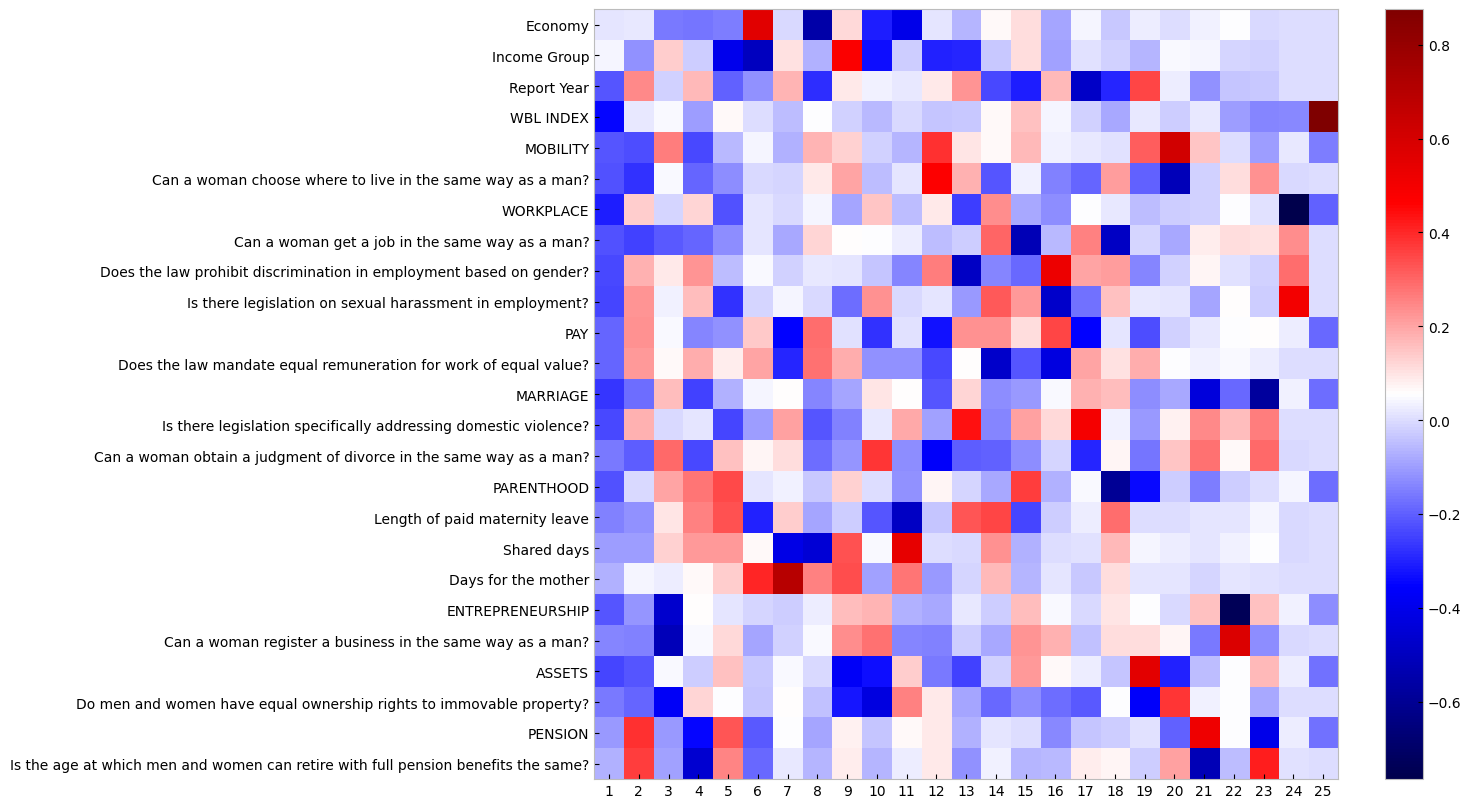

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(df1_1.columns)), df1_1.columns)
plt.xticks(range(len(df1_1.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

**ANALISIS** Por la alta cantidad de variables se hace confuso, igualmente se nota diferenciados los ejes.

In [ ]:
modelo_pca.n_components_

25

In [ ]:
np.arange(len(df1_1.columns)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
modelo_pca.explained_variance_ratio_

array([3.16970949e-01, 1.01156300e-01, 8.00370605e-02, 7.19089389e-02,
       5.27860474e-02, 4.63102029e-02, 4.00254850e-02, 3.66061254e-02,
       3.41505847e-02, 3.25554005e-02, 3.02999519e-02, 2.69270758e-02,
       2.27108463e-02, 1.87816129e-02, 1.73438225e-02, 1.58659981e-02,
       1.30278880e-02, 1.15494905e-02, 8.68109548e-03, 6.72044735e-03,
       5.75262198e-03, 4.99194099e-03, 4.56362661e-03, 2.76487143e-04,
       2.30952718e-33])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.16970949e-01 1.01156300e-01 8.00370605e-02 7.19089389e-02
 5.27860474e-02 4.63102029e-02 4.00254850e-02 3.66061254e-02
 3.41505847e-02 3.25554005e-02 3.02999519e-02 2.69270758e-02
 2.27108463e-02 1.87816129e-02 1.73438225e-02 1.58659981e-02
 1.30278880e-02 1.15494905e-02 8.68109548e-03 6.72044735e-03
 5.75262198e-03 4.99194099e-03 4.56362661e-03 2.76487143e-04
 2.30952718e-33]


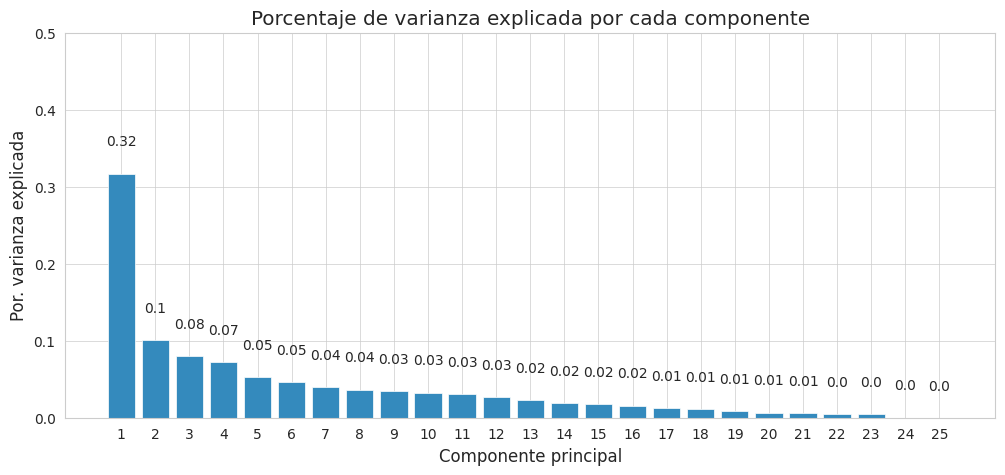

In [ ]:

print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df1_1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,20),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.5)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.31697095, 0.41812725, 0.49816431, 0.57007325, 0.6228593 ,
       0.6691695 , 0.70919498, 0.74580111, 0.77995169, 0.81250709,
       0.84280705, 0.86973412, 0.89244497, 0.91122658, 0.9285704 ,
       0.9444364 , 0.95746429, 0.96901378, 0.97769488, 0.98441532,
       0.99016795, 0.99515989, 0.99972351, 1.        , 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.31697095 0.41812725 0.49816431 0.57007325 0.6228593  0.6691695
 0.70919498 0.74580111 0.77995169 0.81250709 0.84280705 0.86973412
 0.89244497 0.91122658 0.9285704  0.9444364  0.95746429 0.96901378
 0.97769488 0.98441532 0.99016795 0.99515989 0.99972351 1.
 1.        ]


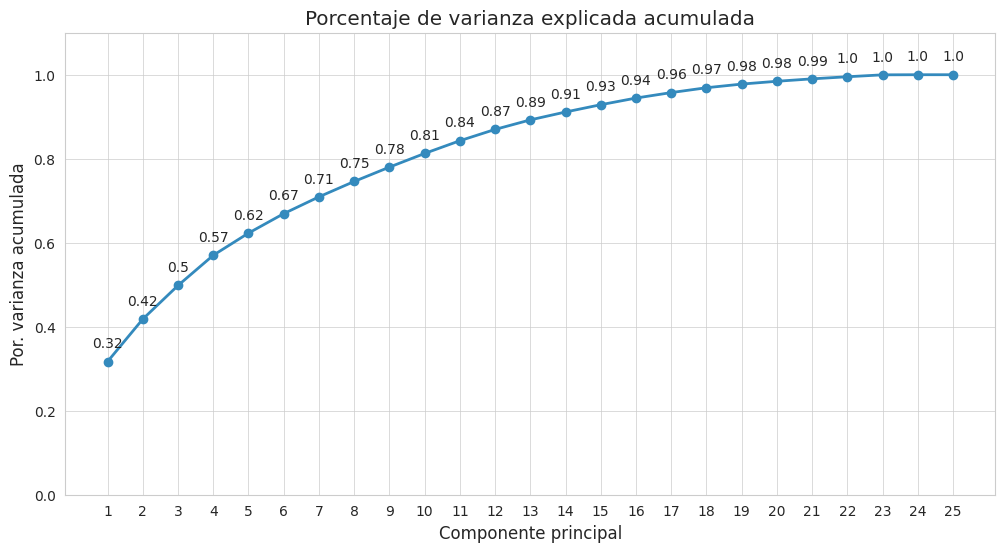

In [ ]:

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(
    np.arange(len(df1_1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1_1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

##13 Regresion Linear

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
X = df1[['MOBILITY', 'PENSION', 'MARRIAGE','WORKPLACE']]
y = df1['WBL INDEX']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([0.1804499 , 0.1587452 , 0.19964468, 0.26426854])

In [ ]:
regressor.intercept_

11.331810502380968

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MOBILITY,0.180450
PENSION,0.158745
MARRIAGE,0.199645
WORKPLACE,0.264269


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([36.30161629, 55.92371846, 55.92371846, ..., 66.49906191,
       63.83671495, 51.95508845])

In [ ]:
y_test

1121    22.500
318     55.625
9133    50.000
1149    61.250
33      26.250
         ...  
1362    76.875
1437    36.875
9696    70.625
8601    63.750
56      59.375
Name: WBL INDEX, Length: 3021, dtype: float64

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
1121,22.500,36.301616,-13.801616,-61.340517
318,55.625,55.923718,-0.298718,-0.537022
9133,50.000,55.923718,-5.923718,-11.847437
1149,61.250,63.318361,-2.068361,-3.376916
33,26.250,30.411295,-4.161295,-15.852553
...,...,...,...,...
1362,76.875,79.145608,-2.270608,-2.953636
1437,36.875,36.819970,0.055030,0.149233
9696,70.625,66.499062,4.125938,5.842036
8601,63.750,63.836715,-0.086715,-0.136023


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Sesgo'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Error_porc'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sesgo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Error_porc'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Actual', 'Predicted'], ['Predicted', 'Sesgo'], ['Sesgo', 'Error_porc']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Sesgo'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Error_porc'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Sesgo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Error_porc'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Actual', 'Predicted'], ['Predicted', 'Sesgo'], ['Sesgo', 'Error_porc']]], **{})
chart

**ANALISIS** En el modelo de regresion linear, en lo relativo a matrimonio, pension, matrimonio y lugar de trabajo, en los modelos actuales la prediccion demuestra un avance pero en el modelo predicho no se nota de manera uniforme ese crecimiento. La nota en particular, por el tipo de variable es alto el sesgo.